In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from datetime import datetime, timedelta, timezone
from datetime import timezone
sys.path.append('/home/manu/TFG_repo/scripts')

In [12]:
from config import data_dir
from analysis_functions import *
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

In [13]:
temp, pres, date, lat, lon = load_time_series('station7.nc')
df_fit_7 = load_SHDR_fit('station7_fit.csv')

In [8]:
print(df_fit_7['b3'])

0   -0.002332
1   -0.001458
2   -0.002866
3   -0.002584
4   -0.002281
5   -0.003133
Name: b3, dtype: float64


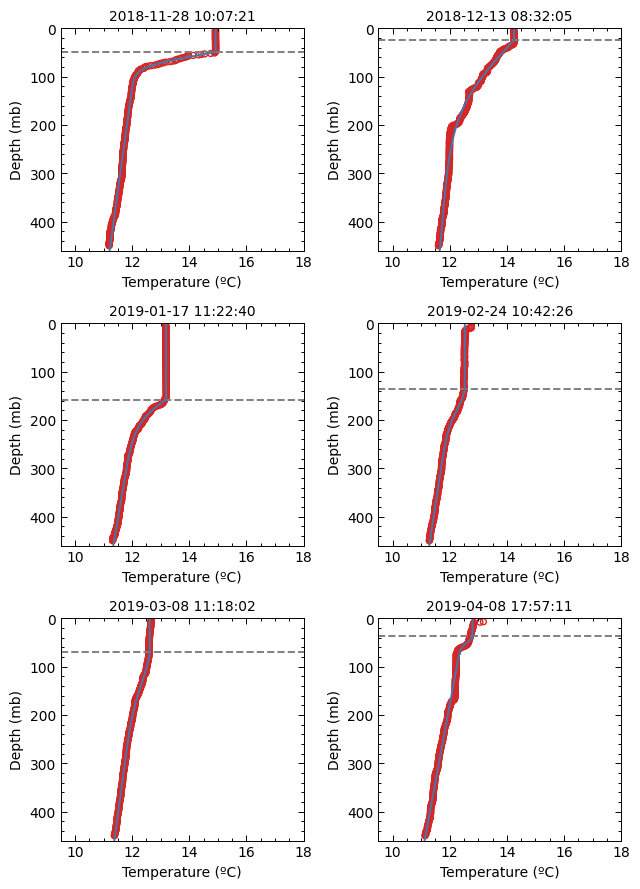

In [7]:
plot_multiple_profiles(df_fit_7, temp, pres, range(6))

In [58]:
# dont run this cell o se va todo a la leche
df_fit_ref = load_SHDR_fit('AGL_1_37_56_b3_test_with_reference.csv')
df_fit = load_SHDR_fit('AGL_1_37_56_b3_test_fit.csv')
df_fit_cons =  load_SHDR_fit('AGL_1_37_56_b3_test_consecutive_fit.csv')

In [32]:
temp, pres, date, lat, lon = load_time_series('processed/AGL_1_37_56_b3_test.nc')

In [33]:
locs = np.linspace(0, len(date) -1, 26, dtype='int')

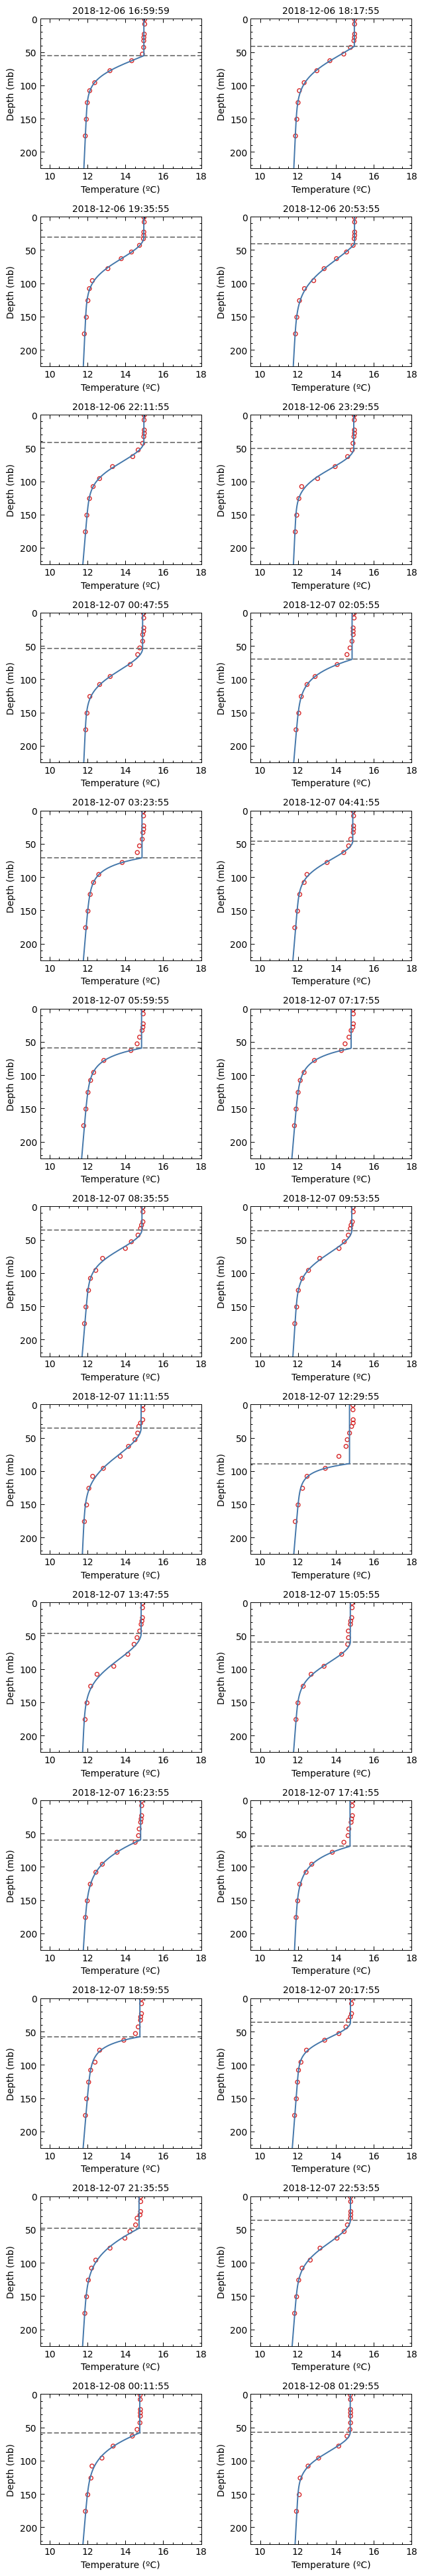

In [18]:
plot_multiple_profiles(df_fit_ref, temp, pres, locs)

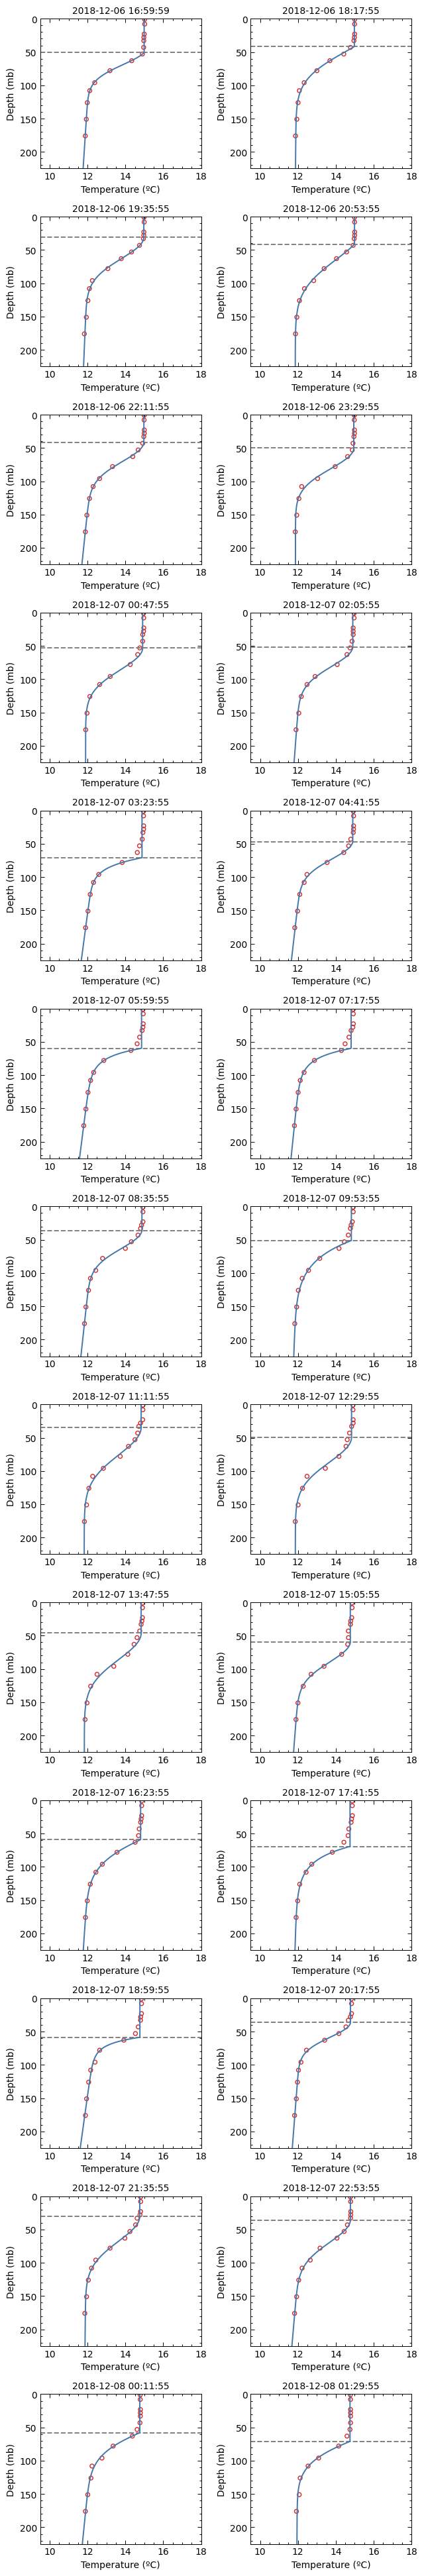

In [19]:
plot_multiple_profiles(df_fit, temp, pres, locs)

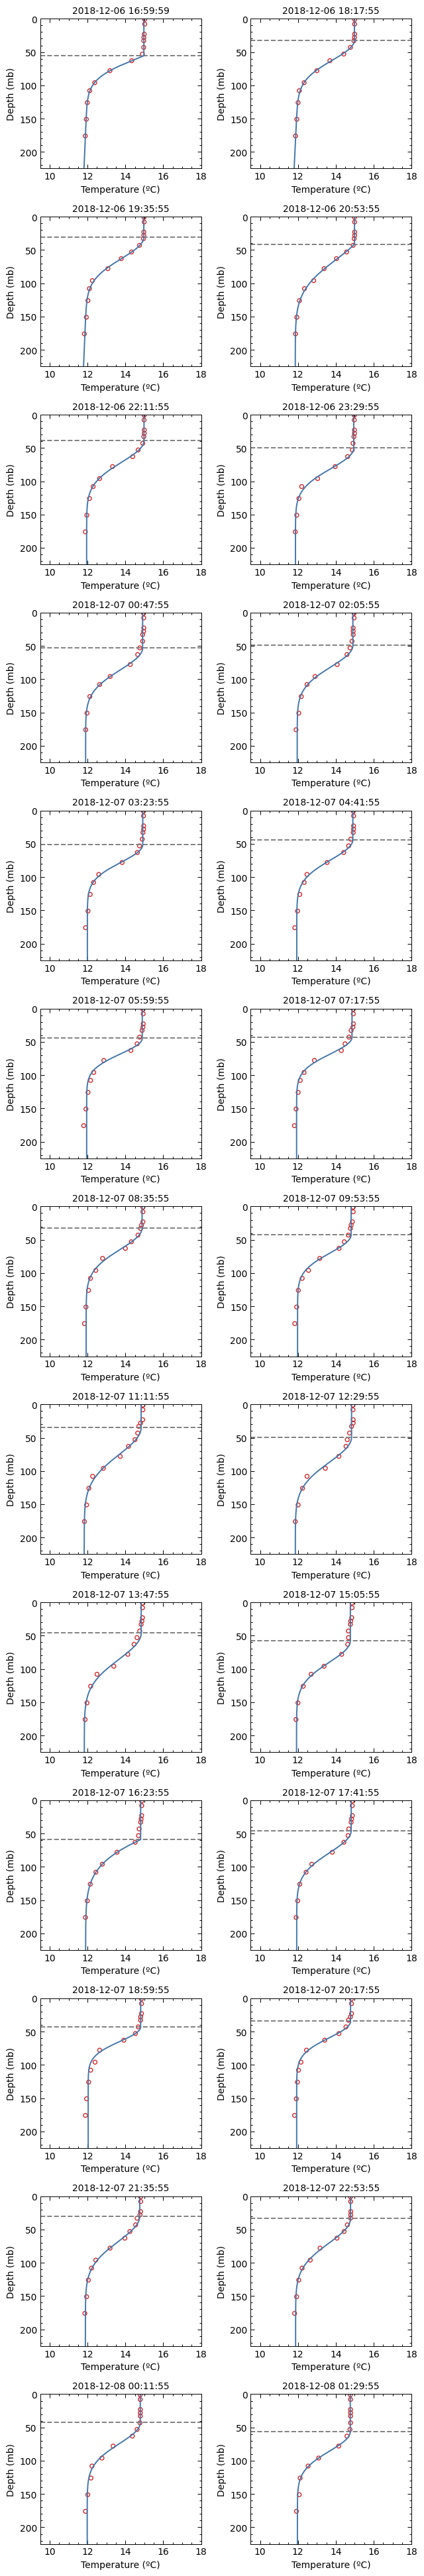

In [36]:
plot_multiple_profiles(df_fit_cons, temp, pres, locs)

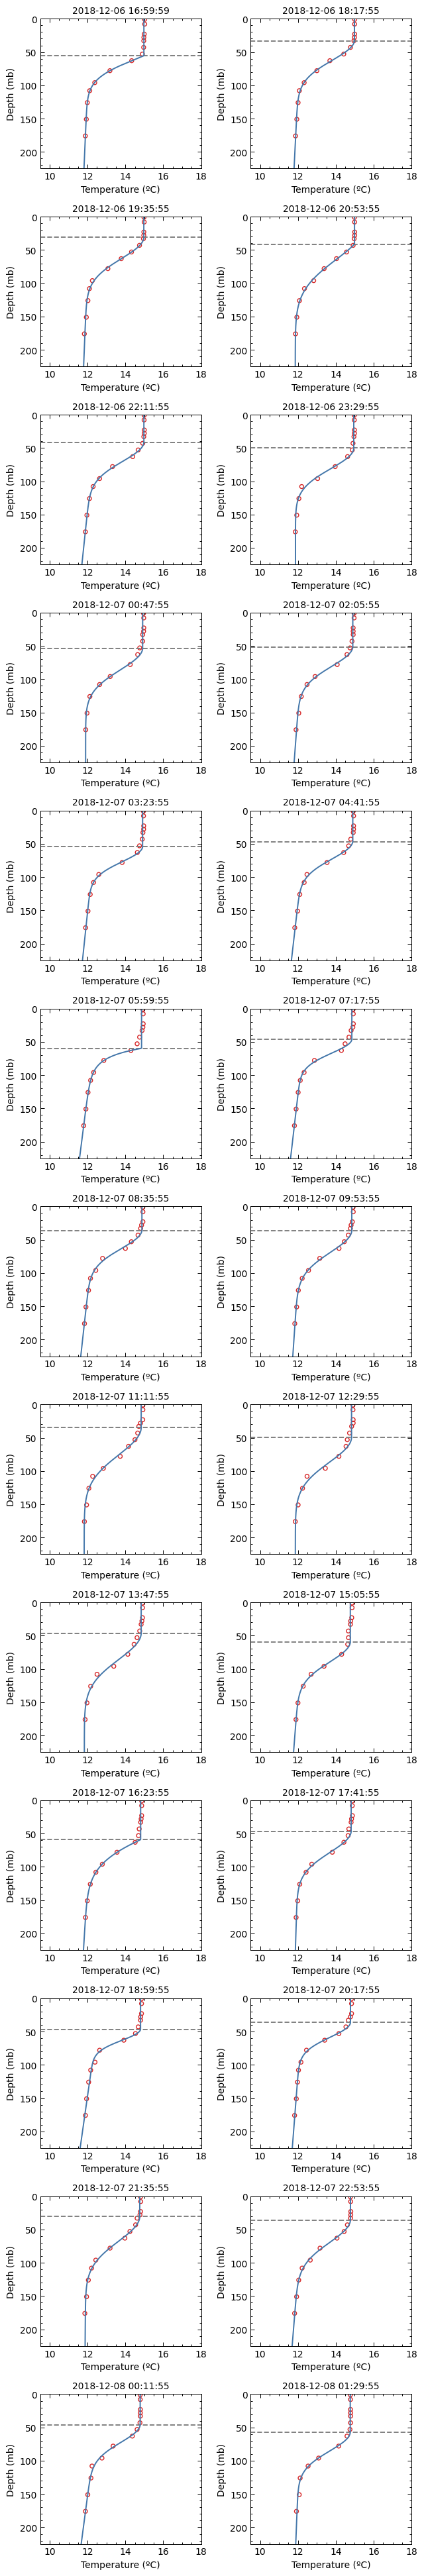

In [59]:
plot_multiple_profiles(df_fit_cons, temp, pres, locs)

In [70]:
def fit_and_fit_with_reference(df_fit, df_fit_ref, temp, pres, loc):
    
    temp = masked_to_array(temp[loc])
    pres = masked_to_array(pres[loc])
    zz = np.linspace(0, pres[-1] + 5, 300)    
    
    fig, ax = plt.subplots(figsize=(4, 4.6875))
    ax.scatter(temp, pres, marker='o', fc='None', ec='tab:red', s=22)
    ax.axhline(df_fit.iloc[loc, 3], c='grey', ls='--', label='MLD no ref') # plot MLD
    ax.axhline(df_fit_ref.iloc[loc, 3], c='grey', ls=':', label='MLD ref') # plot MLD
    ax.set_ylim(pres[-1] + 10, 0)
    ax.set_xlim(9.5, 18)
    ax.plot(fit_function(zz, df_fit, loc), zz, ls='--', label='no reference')
    ax.plot(fit_function(zz, df_fit_ref, loc), zz, label='reference')
    ax.set_xlabel('Temperature (ºC)')
    ax.set_ylabel('Depth (mb)')
    ax.set_title(df_fit['Dates'].iloc[loc])
    ax.legend()
    fig.tight_layout()
    plt.show()


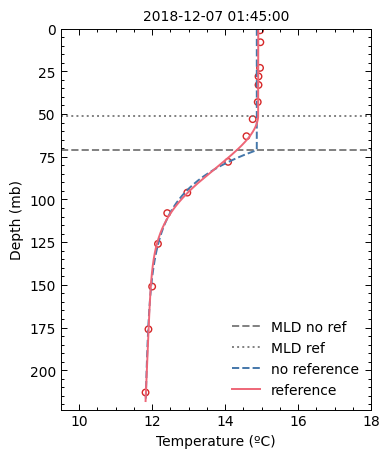

In [97]:
fit_and_fit_with_reference(df_fit, df_fit_ref, temp, pres, 6300)

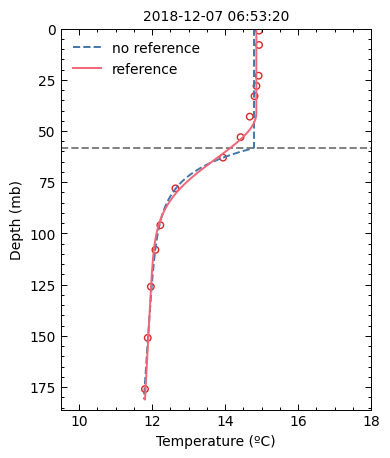

In [45]:
fit_and_fit_with_reference(df_fit, df_fit_ref, temp, pres, 10000)

loc = df_fit.index[df_fit['em'] > np.mean(df_fit['em']) + np.std(df_fit['em'])]

In [57]:
row = 3
a = array[1:, row]
b = array[:-1, row]
c = np.divide(a, b, out=np.zeros_like(a), where=b!=0)
print(np.mean(c))

2041853137403828.0


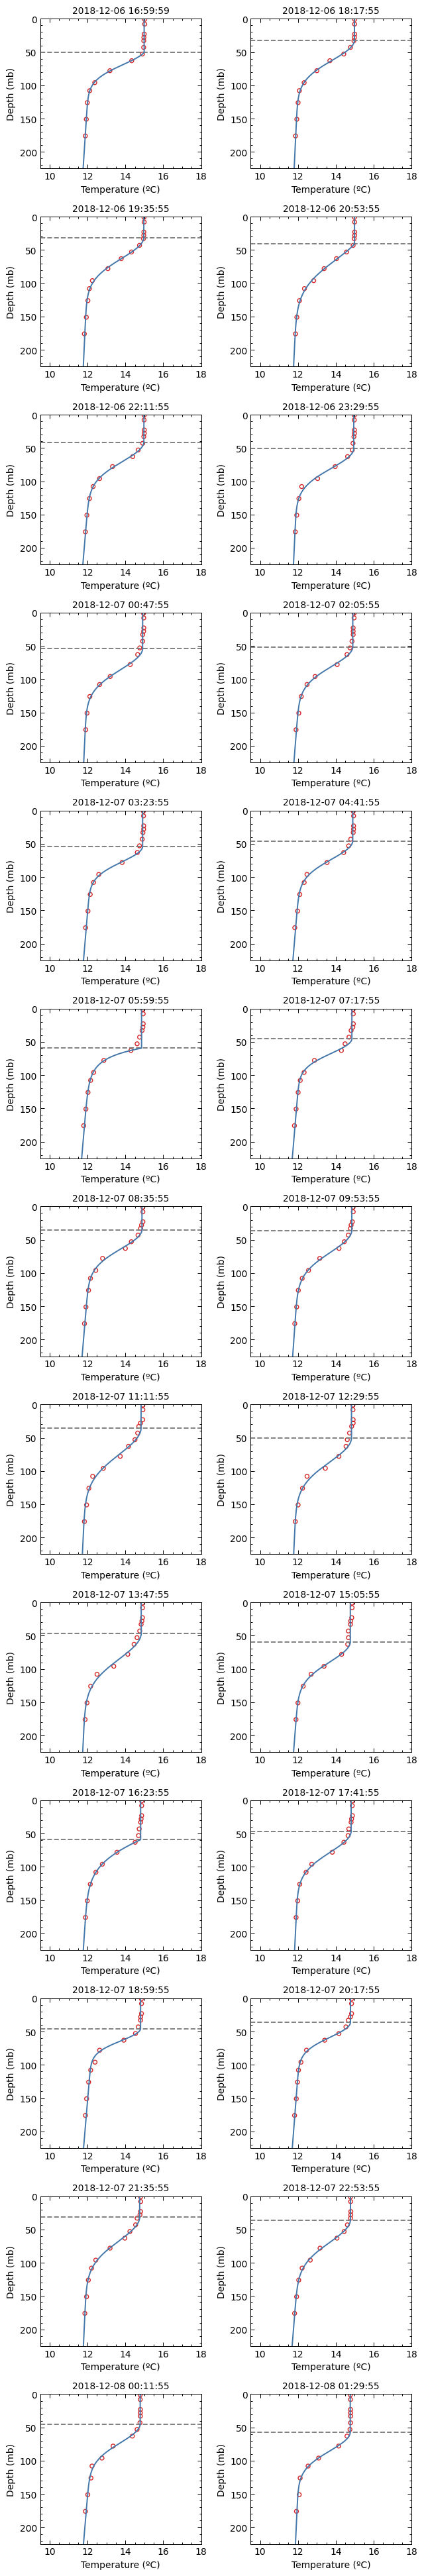

In [34]:
df_fit_cons =  load_SHDR_fit('AGL_1_37_56_b3_test_fit.csv')
plot_multiple_profiles(df_fit_cons, temp, pres, locs)

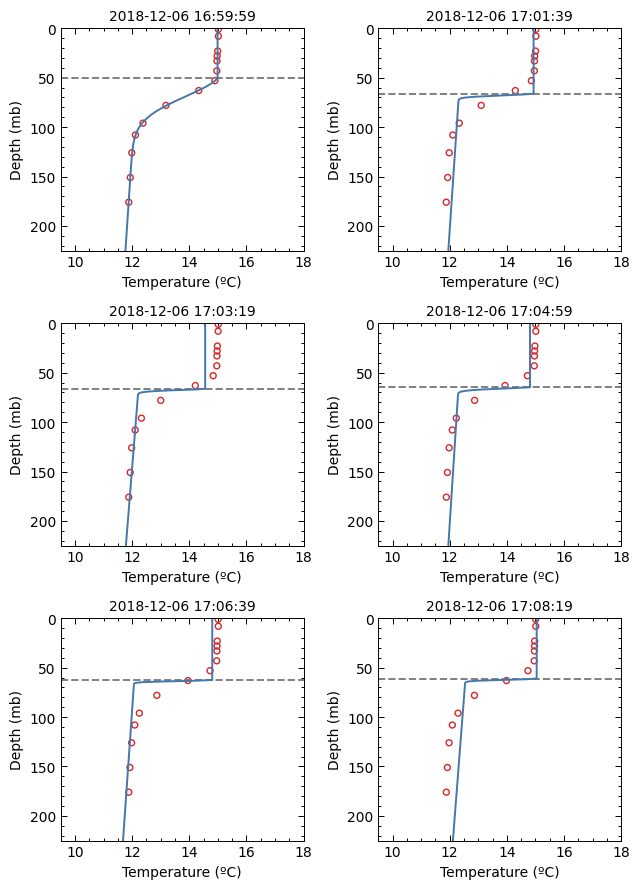

                Dates     lat    lon         D1        b2        c2        b3  \
0 2018-12-06 16:59:59  43.789  3.782  50.584191  0.009918  0.000886 -0.002285   
1 2018-12-06 17:00:04  43.789  3.782  56.447479  0.389945  0.450077 -0.002499   
2 2018-12-06 17:00:09  43.789  3.782  66.202501  0.051268  0.047322 -0.002762   
3 2018-12-06 17:00:14  43.789  3.782  63.672282  0.279054  0.028104 -0.002604   
4 2018-12-06 17:00:19  43.789  3.782  67.320420  0.307532  0.101920 -0.002664   

         a2         a1         a3        em  
0  2.826158  14.988050  12.161892  0.018683  
1  2.656964  15.022306  12.365341  0.598219  
2  2.465838  14.903031  12.437193  0.297466  
3  2.833854  15.115417  12.281563  0.349533  
4  2.702988  14.961106  12.258118  0.313768  


In [40]:
df_fit_cons_updated =  load_SHDR_fit('AGL_1_37_56_b3_test_updated_b3_lims_fit.csv')
plot_multiple_profiles(df_fit_cons_updated, temp, pres, np.arange(0, 120, 20))
print(df_fit_cons_updated.head())

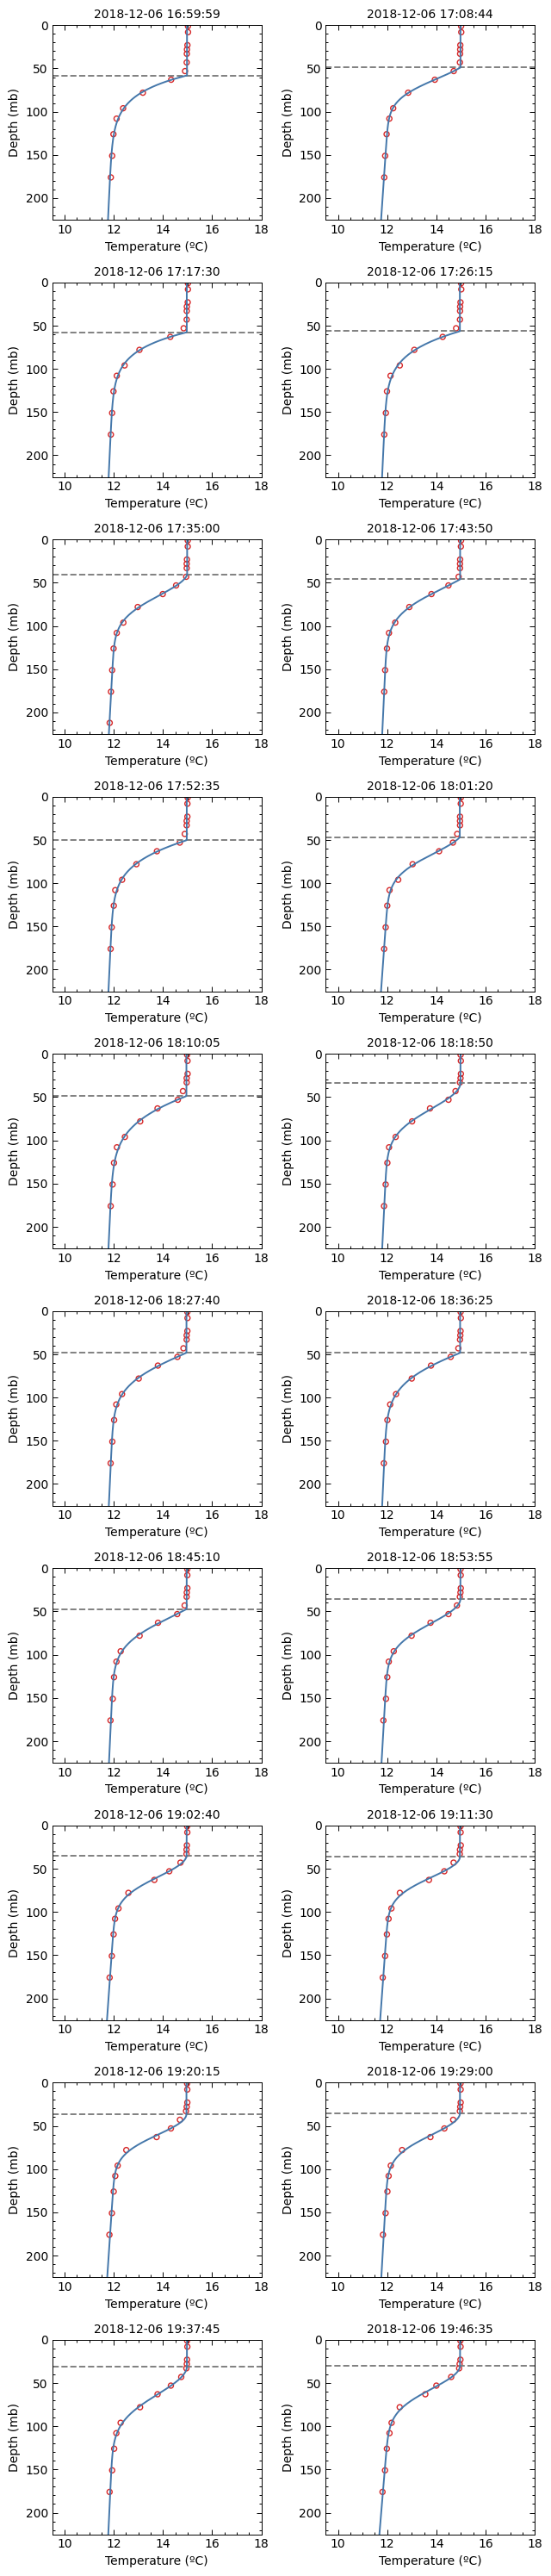

                Dates     lat    lon         D1        b2        c2        b3  \
0 2018-12-06 16:59:59  43.789  3.782  57.995384  0.046559  0.000101 -0.001626   
1 2018-12-06 17:00:04  43.789  3.782  56.214258  0.031575  0.000465 -0.001626   
2 2018-12-06 17:00:09  43.789  3.782  55.623040  0.029919  0.000544 -0.001626   
3 2018-12-06 17:00:14  43.789  3.782  56.146803  0.031256  0.000489 -0.001626   
4 2018-12-06 17:00:19  43.789  3.782  55.567727  0.029273  0.000560 -0.001626   

         a2         a1         a3        em  
0  2.939673  14.974800  12.035127  0.039858  
1  2.903913  14.978843  12.074930  0.026610  
2  2.899927  14.975429  12.075501  0.027899  
3  2.904191  14.980186  12.075995  0.027582  
4  2.897325  14.975214  12.077890  0.032668  


In [53]:
df_fit_cons_updated =  load_SHDR_fit('AGL_1_37_56_b3_test_updated_b3_lims_fit.csv')
plot_multiple_profiles(df_fit_cons_updated, temp, pres, np.linspace(0, 1999, 20, dtype='int'))
print(df_fit_cons_updated.head())

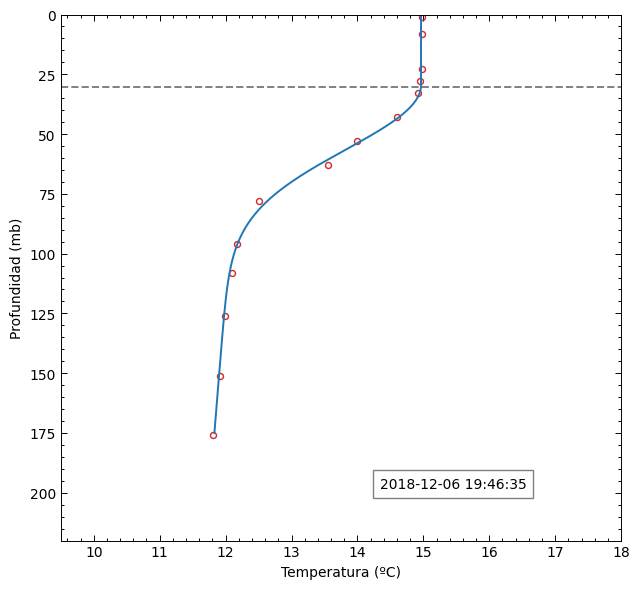

In [57]:
animate_profile_evolution(df_fit_cons_updated, temp, pres, 0, 1999, 200, 'ola.mp4')

In [80]:
def sum(x, y):
    return (x+y)*
from numba import njit

In [81]:
sum_jit = njit(sum)

In [85]:
x = np.random.random(2000000)
y = np.random.random(2000000)

In [86]:
a = sum_jit(x, y)

In [87]:
b = sum(x, y)